In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn import datasets

## Prametres used for the calculations

    # node2vec
    df = pd.read_csv('../results/20200401-163231_karate_results.csv', sep=',')
    node2vec = Node2Vec(G, dimensions=128, walk_length=walk_length, num_walks=num_walks, p=p, q=q)
    model = node2vec.fit(window=10, min_count=1, workers=CORES-1, seed=1)

In [69]:
df = pd.read_csv('../results/20200401-163231_karate_results.csv', sep=',')

In [70]:
df

walk_length  num_walks    p    q   adj_rand_score  f1_micro   f1_macro
0                30          5  0.1  0.1         0.030978  0.382353   0.355014
1                30          5  0.1  0.2        -0.011617  0.441176   0.416441
2                30          5  0.1  0.3        -0.008147  0.558824   0.525581
3                30          5  0.1  0.4        -0.011925  0.529412   0.462451
4                30          5  0.1  0.5        -0.027237  0.470588   0.468750
...             ...        ...  ...  ...              ...       ...        ...
250485           90         28  1.8  2.8         0.882258  0.029412   0.028571
250486           90         28  1.8  2.9         0.882258  0.970588   0.970563
250487           90         28  1.8  3.0         0.882258  0.029412   0.028571
250488           90         28  1.8  3.1         0.882258  0.970588   0.970563
250489           90         28  1.8  3.2         0.882258  0.029412   0.028571

[250490 rows x 7 columns]

In [4]:
df.describe()

walk_length      num_walks              p              q  \
count  249270.000000  249270.000000  249270.000000  249270.000000   
mean       59.587195      16.845019       1.947421       1.949944   
std        19.822994       7.137167       1.096214       1.096572   
min        30.000000       5.000000       0.100000       0.100000   
25%        40.000000      11.000000       1.000000       1.000000   
50%        60.000000      17.000000       1.900000       1.900000   
75%        80.000000      23.000000       2.900000       2.900000   
max        90.000000      29.000000       3.800000       3.800000   

        adj_rand_score       f1_micro       f1_macro  
count    249270.000000  249270.000000  249270.000000  
mean          0.705304       0.479315       0.471319  
std           0.304973       0.421685       0.424633  
min          -0.031139       0.000000       0.000000  
25%           0.771725       0.029412       0.028571  
50%           0.882258       0.352941       0.308576  
75%           0.882258       0.970588       0.970563  
max           1.000000       1.000000       1.000000

In [5]:
df_8010 = df.loc[(df['walk_length']==80) & (df['num_walks']==10) & (df['f1_micro']>=0.9), 
                 ['p','q','f1_micro'] ].reset_index()

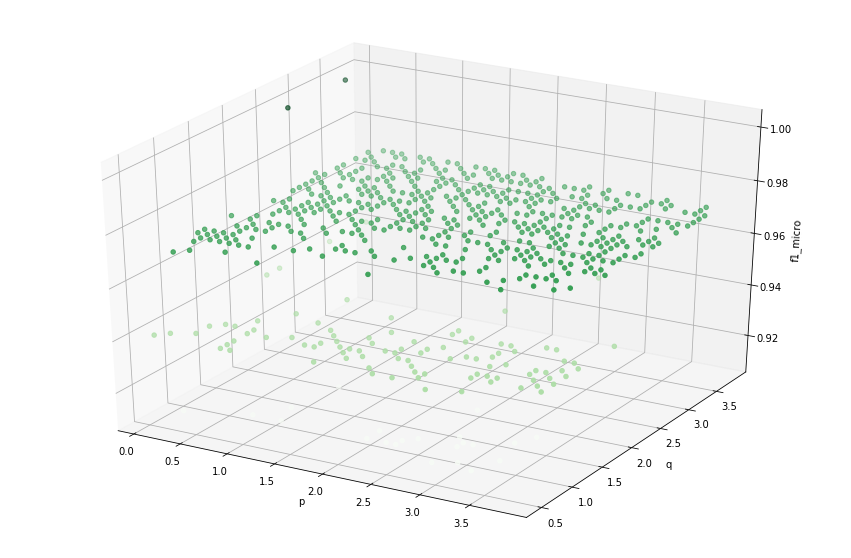

In [6]:
# p x q
fig= plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.scatter3D(df_8010['p'], df_8010['q'], df_8010['f1_micro'], c=df_8010['f1_micro'], cmap='Greens');
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('f1_micro');

In [7]:
df_0101 = df.loc[(df['p']==1.0) & (df['q']==1.0), ['walk_length','num_walks','f1_micro'] ].reset_index()

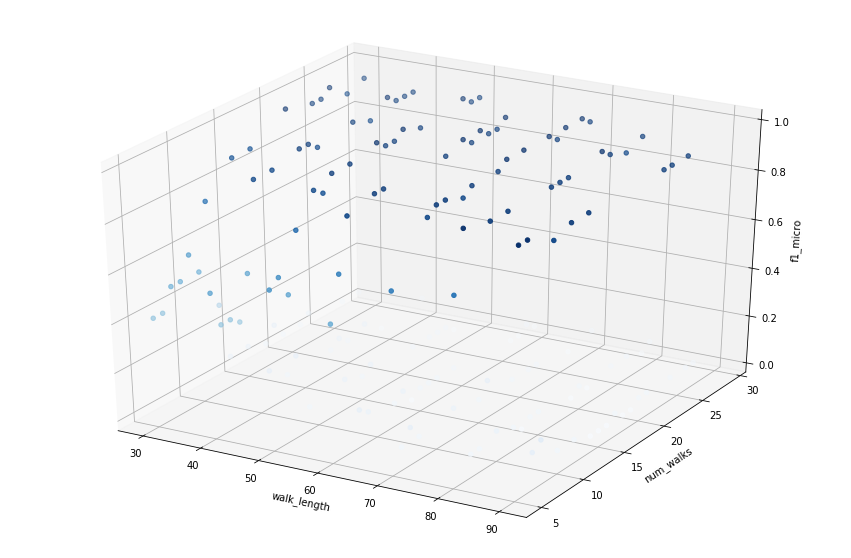

In [8]:
# walk_length x num_walks
fig2 = plt.figure(figsize=(15,10))
ax2 = plt.axes(projection='3d')

ax2.scatter3D(df_0101['walk_length'], df_0101['num_walks'], df_0101['f1_micro'], c=df_0101['f1_micro'], cmap='Blues');
ax2.set_xlabel('walk_length')
ax2.set_ylabel('num_walks')
ax2.set_zlabel('f1_micro');


In [9]:
df_8001 = df.loc[(df['walk_length']==80) & (df['q']==1.0), ['num_walks','p','f1_micro'] ].reset_index()

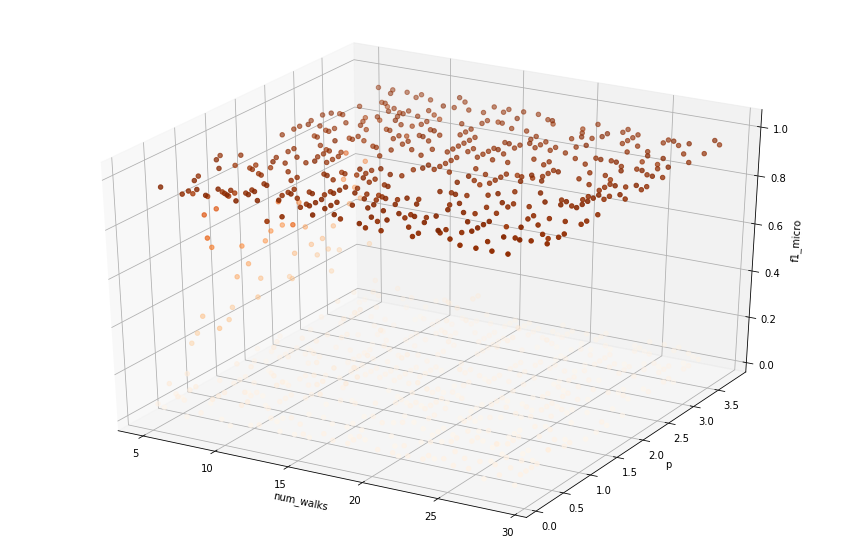

In [10]:
# num_walks x p
fig2 = plt.figure(figsize=(15,10))
ax2 = plt.axes(projection='3d')

ax2.scatter3D(df_8001['num_walks'], df_8001['p'], df_8001['f1_micro'], c=df_8001['f1_micro'], cmap='Oranges');
ax2.set_xlabel('num_walks')
ax2.set_ylabel('p')
ax2.set_zlabel('f1_micro');

In [11]:
df_0101 = df.loc[(df['walk_length']==80) & (df['q']==1.0), ['walk_length','num_walks','f1_micro'] ].reset_index()

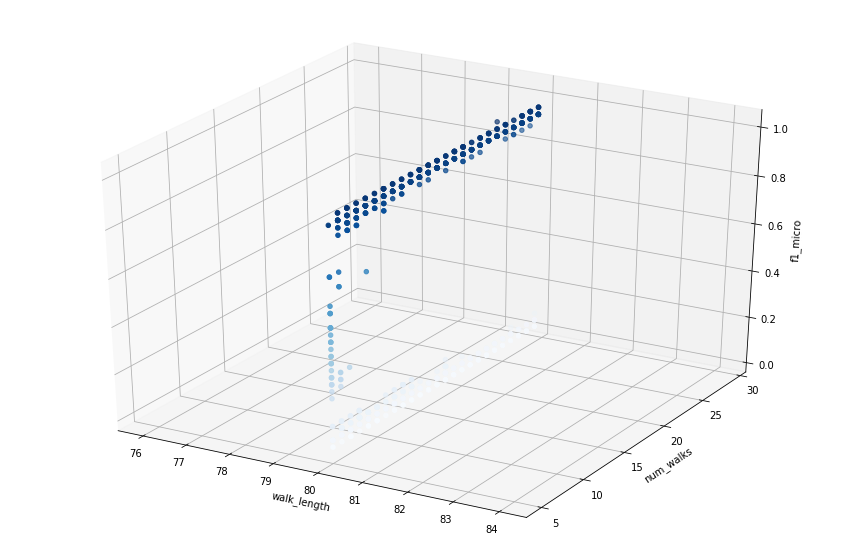

In [12]:
# walk_length x num_walks
fig2 = plt.figure(figsize=(15,10))
ax2 = plt.axes(projection='3d')

ax2.scatter3D(df_0101['walk_length'], df_0101['num_walks'], df_0101['f1_micro'], c=df_0101['f1_micro'], cmap='Blues');
ax2.set_xlabel('walk_length')
ax2.set_ylabel('num_walks')
ax2.set_zlabel('f1_micro');

In [13]:
df_09plus = df.loc[(df['walk_length']==80) & (df['num_walks']==10) & (df['f1_micro']>=0.9), 
                   ['p','q','f1_micro'] ].reset_index()

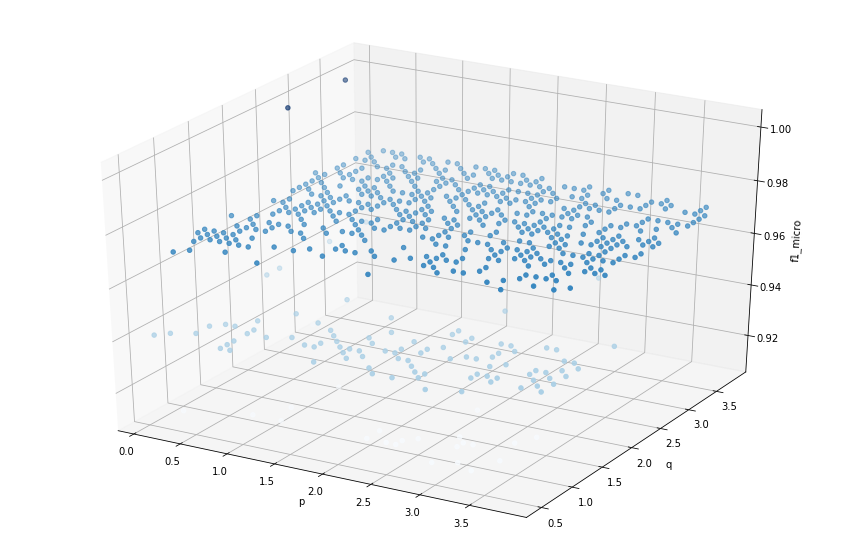

In [14]:
# p x q for f1_micro>=0.9
fig09plus = plt.figure(figsize=(15,10))
ax09plus = plt.axes(projection='3d')

ax09plus.scatter3D(df_09plus['p'], df_09plus['q'], df_09plus['f1_micro'], c=df_09plus['f1_micro'], cmap='Blues');
ax09plus.set_xlabel('p')
ax09plus.set_ylabel('q')
ax09plus.set_zlabel('f1_micro');

In [15]:
df_09plus0101 = df.loc[(df['p']==1.0) & (df['q']==1.0) & (df['f1_micro']>=0.9), 
                   ['walk_length','num_walks','f1_micro'] ].reset_index()

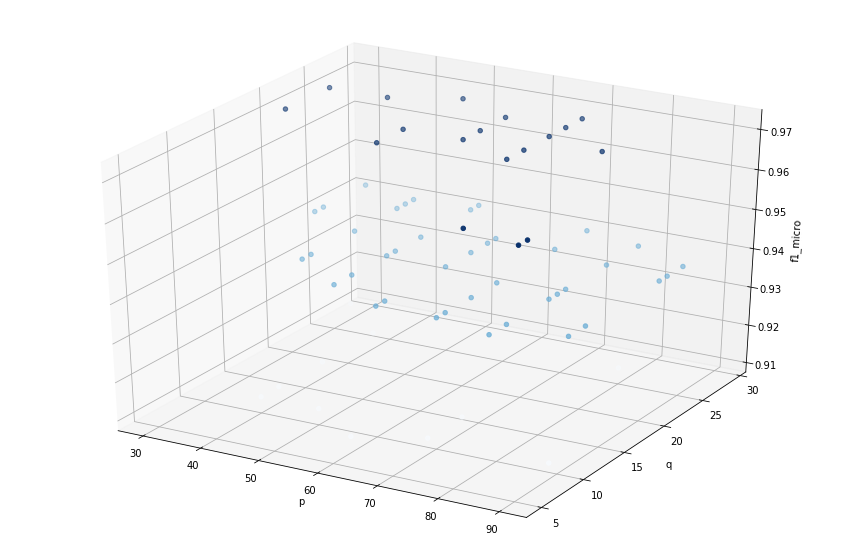

In [16]:
# walk_length x num_walks for f1_micro>=0.9
fig09plus0101 = plt.figure(figsize=(15,10))
ax09plus0101 = plt.axes(projection='3d')

ax09plus0101.scatter3D(df_09plus0101['walk_length'], df_09plus0101['num_walks'], df_09plus0101['f1_micro'], 
                       c=df_09plus0101['f1_micro'], cmap='Blues');
ax09plus0101.set_xlabel('p')
ax09plus0101.set_ylabel('q')
ax09plus0101.set_zlabel('f1_micro');

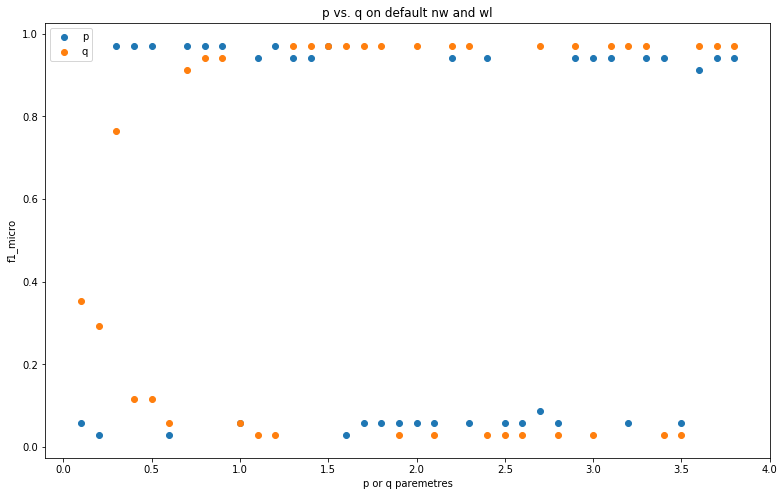

In [17]:
df_p = df.loc[(df['walk_length']==80) & (df['num_walks']==15) & (df['q']==1.0), ['p','q','f1_micro'] ].reset_index()
df_q = df.loc[(df['walk_length']==80) & (df['num_walks']==15) & (df['p']==1.0), ['p','q','f1_micro'] ].reset_index()

fig2 = plt.figure(figsize=(13,8))

# line 1 points 
x1 = df_p['p'].tolist()
y1 = df_p['f1_micro'].tolist()
# plotting the line 1 points  
plt.scatter(x1, y1, label = "p") 
  
# line 2 points 
x2 = df_q['q'].tolist()
y2 = df_q['f1_micro'].tolist()
# plotting the line 2 points  
plt.scatter(x2, y2, label = "q") 
  
# naming the x axis 
plt.xlabel('p or q paremetres') 
# naming the y axis 
plt.ylabel('f1_micro') 
# giving a title to my graph 
plt.title('p vs. q on default nw and wl') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()

In [18]:
df_09plus = df.loc[df['f1_micro']>=0.9,['walk_length','num_walks','p','q','f1_micro'] ].reset_index()

In [19]:
df_09plus.describe()

index  walk_length     num_walks             p             q  \
count   95661.000000  95661.00000  95661.000000  95661.000000  95661.000000   
mean   133538.683591     61.62365     17.929031      1.906111      2.246395   
std     69226.111493     19.42413      6.733263      1.103253      0.961885   
min      2905.000000     30.00000      5.000000      0.100000      0.100000   
25%     75495.000000     50.00000     12.000000      0.900000      1.500000   
50%    135804.000000     60.00000     18.000000      1.900000      2.300000   
75%    193637.000000     80.00000     24.000000      2.900000      3.100000   
max    249268.000000     90.00000     29.000000      3.800000      3.800000   

           f1_micro  
count  95661.000000  
mean       0.963195  
std        0.015651  
min        0.911765  
25%        0.970588  
50%        0.970588  
75%        0.970588  
max        1.000000

In [20]:
df_01 = df.loc[df['f1_micro']==1,['walk_length','num_walks','p','q','f1_micro'] ].reset_index()

In [21]:
df_01

index  walk_length  num_walks    p    q  f1_micro
0      5806           30          9  0.1  3.1       1.0
1      7254           30         10  0.1  3.5       1.0
2     20500           30         19  0.8  1.9       1.0
3     24563           30         22  0.1  1.6       1.0
4     24582           30         22  0.1  3.5       1.0
..      ...          ...        ...  ...  ...       ...
411  248388           90         27  0.1  2.1       1.0
412  248389           90         27  0.1  2.2       1.0
413  248390           90         27  0.1  2.3       1.0
414  248397           90         27  0.1  3.0       1.0
415  248468           90         27  0.3  2.5       1.0

[416 rows x 6 columns]

In [22]:
best_walk_length = df_01['walk_length'].value_counts().idxmax()

In [23]:
best_num_walks = df_01['num_walks'].value_counts().idxmax()

In [24]:
best_p = df_01['p'].value_counts().idxmax()

In [25]:
best_q = df_01['q'].value_counts().idxmax()

In [38]:
df_best = df.loc[(df['walk_length']==best_walk_length) & (df['num_walks']==best_num_walks),
                 ['p','q','f1_micro'] ].reset_index()

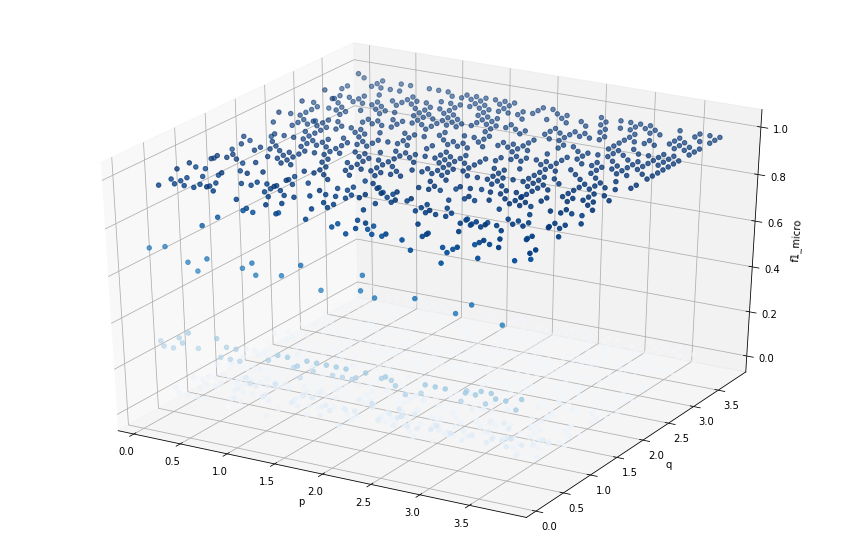

In [40]:
# p x q for f1_micro>=0.9
figbest = plt.figure(figsize=(15,10))
axbest = plt.axes(projection='3d')

axbest.scatter3D(df_best['p'], df_best['q'], df_best['f1_micro'], c=df_best['f1_micro'], cmap='Blues');
axbest.set_xlabel('p')
axbest.set_ylabel('q')
axbest.set_zlabel('f1_micro');

In [68]:
best_p, best_q, best_walk_length, best_num_walks

(0.1, 3.1, 70, 24)

In [46]:
df_best_p = df.loc[(df['walk_length']==best_walk_length) & (df['num_walks']==best_num_walks) & (df['q']==best_q),
                 ['p','f1_micro'] ].reset_index()


In [62]:
df_best_p.head()

index    p  f1_micro
0  171866  0.1  1.000000
1  171904  0.2  0.970588
2  171942  0.3  0.029412
3  171980  0.4  0.970588
4  172018  0.5  0.970588

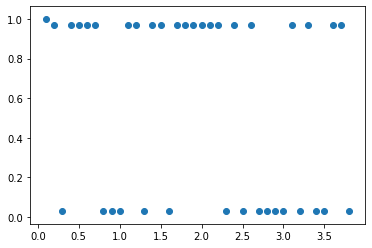

In [54]:
x = df_best_p['p'].to_list()
y = df_best_p['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

In [55]:
df_best_q = df.loc[(df['walk_length']==best_walk_length) & (df['num_walks']==best_num_walks) & (df['p']==best_p),
                 ['q','f1_micro'] ].reset_index()


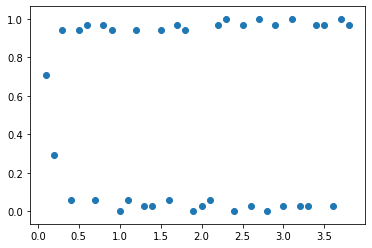

In [57]:
x = df_best_q['q'].to_list()
y = df_best_q['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

In [58]:
df_best_walk_length = df.loc[(df['q']==best_q) & (df['num_walks']==best_num_walks) & (df['p']==best_p),
                 ['walk_length','f1_micro'] ].reset_index()

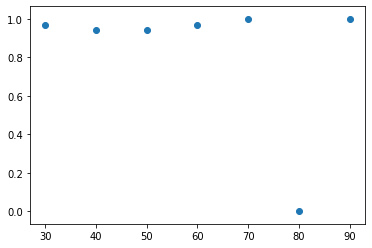

In [59]:
x = df_best_walk_length['walk_length'].to_list()
y = df_best_walk_length['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

In [60]:
df_best_num_walks = df.loc[(df['q']==best_q) & (df['walk_length']==best_walk_length) & (df['p']==best_p),
                 ['num_walks','f1_micro'] ].reset_index()

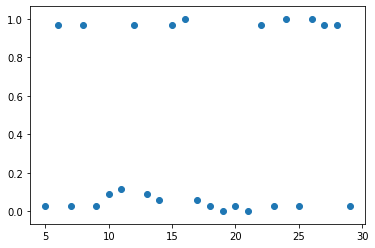

In [61]:
x = df_best_num_walks['num_walks'].to_list()
y = df_best_num_walks['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

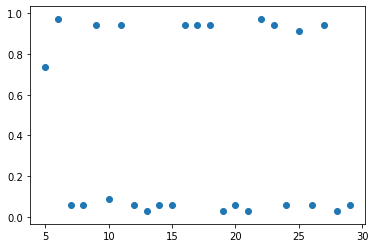

In [64]:
df_default_num_walks = df.loc[(df['q']==1.0) & (df['walk_length']==80) & (df['p']==1.0),
                 ['num_walks','f1_micro'] ].reset_index()

x = df_default_num_walks['num_walks'].to_list()
y = df_default_num_walks['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

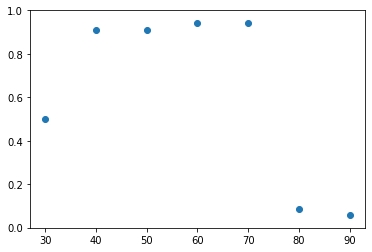

In [65]:
df_default_walk_length = df.loc[(df['q']==1.0) & (df['num_walks']==10) & (df['p']==1.0),
                 ['walk_length','f1_micro'] ].reset_index()

x = df_default_walk_length['walk_length'].to_list()
y = df_default_walk_length['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

Prametres used for the calculations
# node2vec
df = pd.read_csv('../results/20200406-183549_karate_results.csv', sep=',')

node2vec = Node2Vec(G, dimensions=128, walk_length=walk_length, num_walks=num_walks, p=p, q=q)
model = node2vec.fit(size=8, window=2, sg=1, iter=1, min_count=1, workers=CORES-1, seed=1)

In [5]:
df = pd.read_csv('../results/20200406-183549_karate_results.csv', sep=',') 

In [6]:
df

walk_length  num_walks    p    q   adj_rand_score  f1_micro   f1_macro
0            70         24  0.1  0.1         0.072402  0.352941   0.260870
1            70         24  0.1  0.3         0.771725  0.941176   0.940972
2            70         24  0.1  0.5         0.771725  0.941176   0.940972
3            70         24  0.1  0.7         0.771725  0.058824   0.055556
4            70         24  0.1  0.9         0.771725  0.058824   0.055556
5            70         24  0.1  1.1         0.882258  0.029412   0.028571
6            70         24  0.3  0.1         0.072402  0.352941   0.260870
7            70         24  0.3  0.3         0.108870  0.323529   0.244444
8            70         24  0.3  0.5         0.572539  0.117647   0.105263
9            70         24  0.3  0.7         0.882258  0.970588   0.970563
10           70         24  0.3  0.9         0.882258  0.970588   0.970563
11           70         24  0.3  1.1         0.882258  0.029412   0.028571
12           70         24  0.5  0.1         0.072402  0.352941   0.260870
13           70         24  0.5  0.3         0.152760  0.294118   0.227273
14           70         24  0.5  0.5         0.572539  0.117647   0.105263
15           70         24  0.5  0.7         0.668467  0.088235   0.081081
16           70         24  0.5  0.9         0.882258  0.029412   0.028571
17           70         24  0.5  1.1         0.771725  0.058824   0.055556
18           70         24  0.7  0.1         0.072402  0.352941   0.260870
19           70         24  0.7  0.3         0.108870  0.323529   0.244444
20           70         24  0.7  0.5         0.572539  0.117647   0.105263
21           70         24  0.7  0.7         0.771725  0.058824   0.055556
22           70         24  0.7  0.9         0.882258  0.029412   0.028571
23           70         24  0.7  1.1         0.882258  0.970588   0.970563
24           70         24  0.9  0.1         0.072402  0.352941   0.260870
25           70         24  0.9  0.3         0.152760  0.294118   0.227273
26           70         24  0.9  0.5         0.771725  0.941176   0.940972
27           70         24  0.9  0.7         0.771725  0.058824   0.055556
28           70         24  0.9  0.9         1.000000  1.000000   1.000000
29           70         24  0.9  1.1         0.668467  0.911765   0.911072
30           70         24  1.1  0.1         0.072402  0.352941   0.260870
31           70         24  1.1  0.3         0.771725  0.941176   0.940972
32           70         24  1.1  0.5         0.771725  0.941176   0.940972
33           70         24  1.1  0.7         0.771725  0.058824   0.055556
34           70         24  1.1  0.9         0.771725  0.941176   0.940972
35           70         24  1.1  1.1         0.771725  0.058824   0.055556

Text(0.5, 0, 'f1_micro')

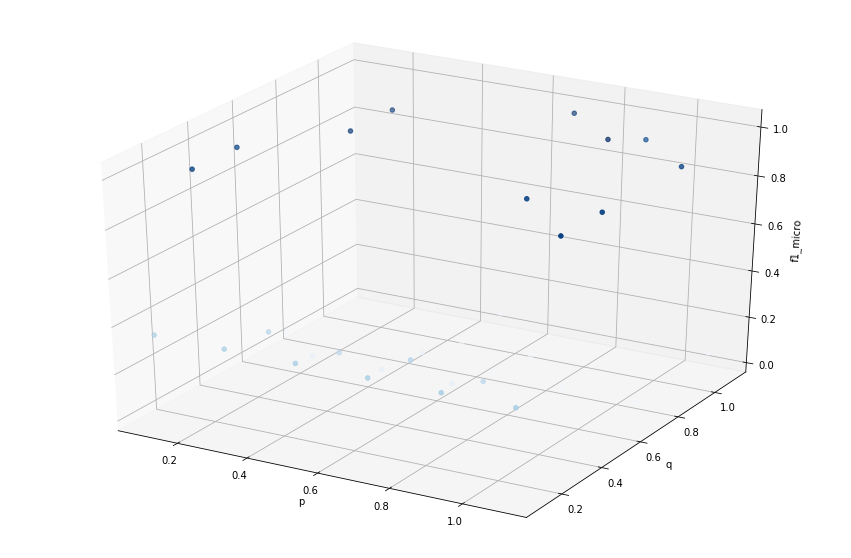

In [9]:
# p x q for f1_micro>=0.9
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.scatter3D(df['p'], df['q'], df['f1_micro'], c=df['f1_micro'], cmap='Blues');
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('f1_micro')

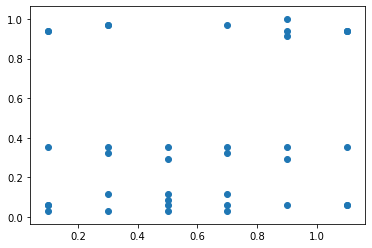

In [11]:
x = df['p'].to_list()
y = df['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

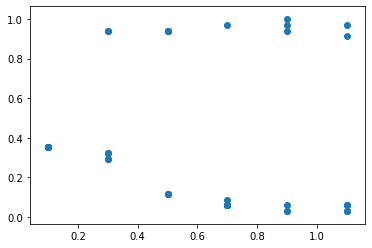

In [12]:
x = df['q'].to_list()
y = df['f1_micro'].to_list()

plt.scatter(x, y)
plt.show()

In [4]:
res_walklen = pd.read_csv('../results/20200408-170027_blog_EPOCH.csv')